In [1]:
import warnings;warnings.simplefilter('ignore')
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'cnn-time-stack.ipynb',
 'DataCleaning.ipynb',
 'feature select.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'README.md',
 'tag盤點表.xlsx',
 'target.jpg',
 'xgboost.ipynb',
 '南亞PA廠資料分析_R6_1219.ipynb']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from  tqdm import tqdm_notebook as tqdm

# load data

In [3]:
df = pd.read_excel("PA_201605-2012001更新R6(20190509).xlsx",index_col = 0,parse_dates = True)
print(df.shape)
df.tail()

(193825, 93)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD
2020-01-14 23:20:00,308.011,308.855,307,308,307,307,307.155,305.605,303.322,301,...,0,4.75646879756469E-06*193821,4.05932,4.053850,3.28494,1407,1405.103894,-0.550185,0.429594,0.006
2020-01-14 23:30:00,307.994,308,306.405,308,306.822,306.105,306.255,305,302.822,300.172,...,0,4.75646879756469E-06*193822,4.06726,4.061772,2.67178,1411.79,1409.883474,-0.899908,0.757286,0.006
2020-01-14 23:40:00,307.011,307.994,306,307.272,306,305.355,305.905,304.155,302,300,...,0,4.75646879756469E-06*193823,4.06527,4.059790,2.83228,1406.83,1404.931948,-0.455118,0.920603,0.006
2020-01-14 23:50:00,307,307.011,305.805,306.971,305.472,304.955,305,303.955,301.971,299.622,...,0,4.75646879756469E-06*193824,4.06097,4.055500,2.98571,1407.55,1405.652984,-0.399457,0.850938,0.006
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006


# HANDLE DATA OF USE COL

In [4]:
def f(x):
    x = str(x).split('*')
    return float(x[1])
df['DATA OF USE'] = df['DATA OF USE'].dropna().apply(f)

# to_numeric

In [5]:
for col in tqdm(df.columns):
    df[col] = pd.to_numeric(df[col],errors='coerce')
print(df.dtypes)


MLPAP_TI-0706B02         float64
MLPAP_TI-0706B03         float64
MLPAP_TI-0706B04         float64
MLPAP_TI-0706B05         float64
MLPAP_TI-0706B06         float64
                          ...   
MLPAP_FI-V211.PV         float64
MLPAP_FI-V211.PV(轉換後)    float64
MLPAP_PI-0658.PV         float64
MLPAP_TIC-0757.PV        float64
MLPAP_V125-PHD           float64
Length: 93, dtype: object


# Missing Data

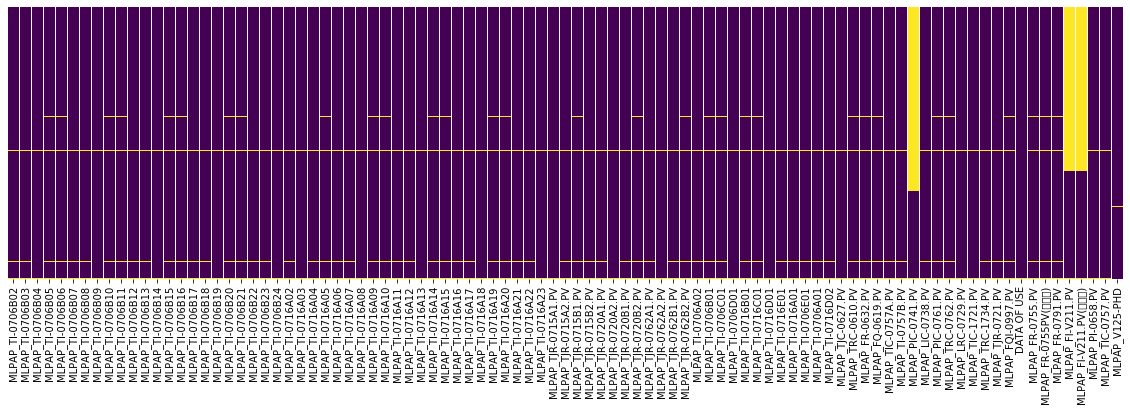

In [6]:
fig = plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.isnull().sum().sort_values(ascending=False)

MLPAP_PIC-0741.PV        131755
MLPAP_FI-V211.PV(轉換後)    117662
MLPAP_FI-V211.PV         117662
MLPAP_FQ-0619.PV           1433
MLPAP_FR-0755PV(轉換後)       1433
                          ...  
MLPAP_TI-0706B23            671
MLPAP_TI-0706B08            671
MLPAP_TJR-0720A1.PV         671
MLPAP_TI-0716E01            671
DATA OF USE                   1
Length: 93, dtype: int64

# boxplot

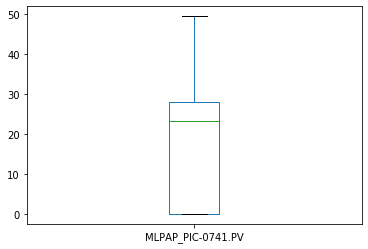

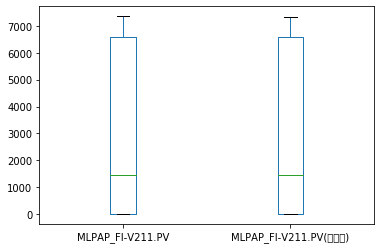

In [8]:
df[['MLPAP_PIC-0741.PV']].plot(kind='box')
plt.show()

df[['MLPAP_FI-V211.PV','MLPAP_FI-V211.PV(轉換後)']].plot(kind='box')
plt.show()

# correlation

In [9]:
col = 'MLPAP_PIC-0741.PV'
CORR = abs(df.corr()).sort_values(by=col,ascending=False)[[col]].head(6)
print(CORR.index.tolist())
CORR

['MLPAP_PIC-0741.PV', 'MLPAP_TJR-0721.PV', 'MLPAP_TIC-0757A.PV', 'MLPAP_TI-0716A06', 'MLPAP_TI-0716C01', 'MLPAP_TI-0706B05']


,MLPAP_PIC-0741.PV
MLPAP_PIC-0741.PV,1.000000
MLPAP_TJR-0721.PV,0.907504
MLPAP_TIC-0757A.PV,0.904367
MLPAP_TI-0716A06,0.899273
MLPAP_TI-0716C01,0.899050
MLPAP_TI-0706B05,0.899026


In [10]:
col = 'MLPAP_FI-V211.PV'
CORR = abs(df.corr()).sort_values(by=col,ascending=False)[[col]].head(6)
print(CORR.index.tolist())
CORR

['MLPAP_FI-V211.PV(轉換後)', 'MLPAP_FI-V211.PV', 'MLPAP_PIC-0741.PV', 'MLPAP_TJR-0720B2.PV', 'MLPAP_LRC-0729.PV', 'MLPAP_PI-0658.PV']


,MLPAP_FI-V211.PV
MLPAP_FI-V211.PV(轉換後),1.000000
MLPAP_FI-V211.PV,1.000000
MLPAP_PIC-0741.PV,0.897309
MLPAP_TJR-0720B2.PV,0.819066
MLPAP_LRC-0729.PV,0.707347
MLPAP_PI-0658.PV,0.668418


In [11]:
col = 'MLPAP_FI-V211.PV(轉換後)'
CORR = abs(df.corr()).sort_values(by=col,ascending=False)[[col]].head(6)
print(CORR.index.tolist())
CORR

['MLPAP_FI-V211.PV', 'MLPAP_FI-V211.PV(轉換後)', 'MLPAP_PIC-0741.PV', 'MLPAP_TJR-0720B2.PV', 'MLPAP_LRC-0729.PV', 'MLPAP_PI-0658.PV']


,MLPAP_FI-V211.PV(轉換後)
MLPAP_FI-V211.PV,1.000000
MLPAP_FI-V211.PV(轉換後),1.000000
MLPAP_PIC-0741.PV,0.897309
MLPAP_TJR-0720B2.PV,0.819066
MLPAP_LRC-0729.PV,0.707347
MLPAP_PI-0658.PV,0.668418


# KNN fill miss value

In [12]:
from sklearn.impute import KNNImputer

df = shuffle(df)
step = 10000

for i in tqdm(range(0, len(df), step)):
    start, end = i, min(i+step,len(df))
    imputer = KNNImputer(n_neighbors = 3)
    df.iloc[start:end] = imputer.fit_transform(df.iloc[start:end])

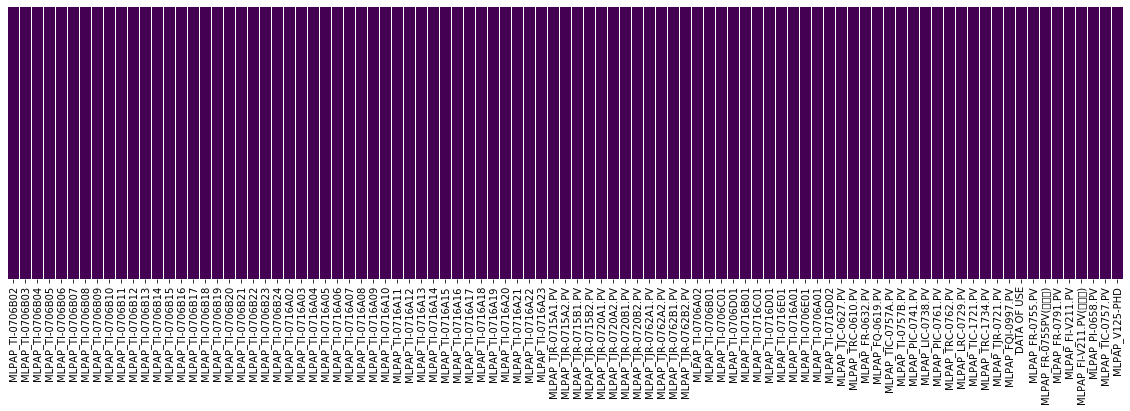

In [13]:
fig = plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df = df.sort_index()
print(df.shape)
df.head()

(193825, 93)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD
2016-05-09 00:00:00,400.0,401.957120,400.751866,402.250788,401.148767,401.0,400.050078,403.0,402.0,401.0,...,0.0,1.0,4.051145,4.045683,6.484770,0.0,0.0,-1.000000,1.635186,0.051
2016-05-09 00:10:00,400.0,401.942713,400.949883,402.249145,401.000000,401.0,400.249800,403.0,402.0,401.0,...,0.0,2.0,4.157856,4.152250,6.449888,0.0,0.0,-1.000000,1.625011,0.051
2016-05-09 00:20:00,400.0,401.900145,400.899767,402.101255,401.000000,401.0,400.100155,403.0,402.0,401.0,...,0.0,3.0,4.208122,4.202449,6.440502,0.0,0.0,-0.898558,1.649780,0.051
2016-05-09 00:30:00,400.0,401.949936,400.900210,402.300333,401.000000,401.0,400.144695,403.0,402.0,401.0,...,0.0,4.0,4.152321,4.146723,6.463649,0.0,0.0,-0.509010,1.635187,0.051
2016-05-09 00:40:00,400.0,402.000000,400.850037,402.176070,401.000000,401.0,400.405002,403.0,402.0,401.0,...,0.0,5.0,4.016713,4.011298,6.414799,0.0,0.0,-0.992771,1.654259,0.051


# save

In [15]:
df.to_csv('./train.csv')
print('save done!')

save done!
